# Clone a fork of donut where predictions are returned with token indices

In [ ]:
!git clone https://github.com/SamSamhuns/donut

Cloning into 'donut'...
remote: Enumerating objects: 342, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 342 (delta 0), reused 3 (delta 0), pack-reused 339
Receiving objects: 100% (342/342), 64.13 MiB | 23.21 MiB/s, done.
Resolving deltas: 100% (164/164), done.


In [ ]:
%cd /content/donut
%pip install .

/content/donut
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/donut
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.9/111.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 

In [ ]:
%cd /content/donut
!wget https://datasets-server.huggingface.co/assets/naver-clova-ix/cord-v2/--/naver-clova-ix--cord-v2/train/12/image/image.jpg

/content/donut
--2022-09-19 14:04:39--  https://datasets-server.huggingface.co/assets/naver-clova-ix/cord-v2/--/naver-clova-ix--cord-v2/train/12/image/image.jpg
Resolving datasets-server.huggingface.co (datasets-server.huggingface.co)... 54.157.109.108, 34.234.197.55, 34.226.254.71, ...
Connecting to datasets-server.huggingface.co (datasets-server.huggingface.co)|54.157.109.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59702 (58K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  58.30K   126KB/s    in 0.5s    

2022-09-19 14:04:41 (126 KB/s) - ‘image.jpg’ saved [59702/59702]



# Document Parsing Example

In [ ]:
import torch
from PIL import Image
from donut import DonutModel, DonutModelCustom

from pprint import pprint as pp


model = DonutModelCustom.from_pretrained(
    "naver-clova-ix/donut-base-finetuned-cord-v2")

if torch.cuda.is_available():
    model.half()
    device = torch.device("cuda")
    model.to(device)
else:
    model.encoder.to(torch.bfloat16)
model.eval()

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLMRobertaTokenizer'. 
The class this function is called from is 'BARTCustomTokenizer'.


DonutModel(
  (encoder): SwinEncoder(
    (model): SwinTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
        (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (0): BasicLayer(
          (blocks): Sequential(
            (0): SwinTransformerBlock(
              (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attn): WindowAttention(
                (qkv): Linear(in_features=128, out_features=384, bias=True)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=128, out_features=128, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
                (softmax): Softmax(dim=-1)
              )
              (drop_path): Identity()
              (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (mlp): M

In [ ]:
img_path = "image.jpg"
image = Image.open(img_path).convert("RGB")
output = model.inference(image=image, prompt="<s_cord-v2>", return_attentions=True, return_confs=True, return_tokens=True)

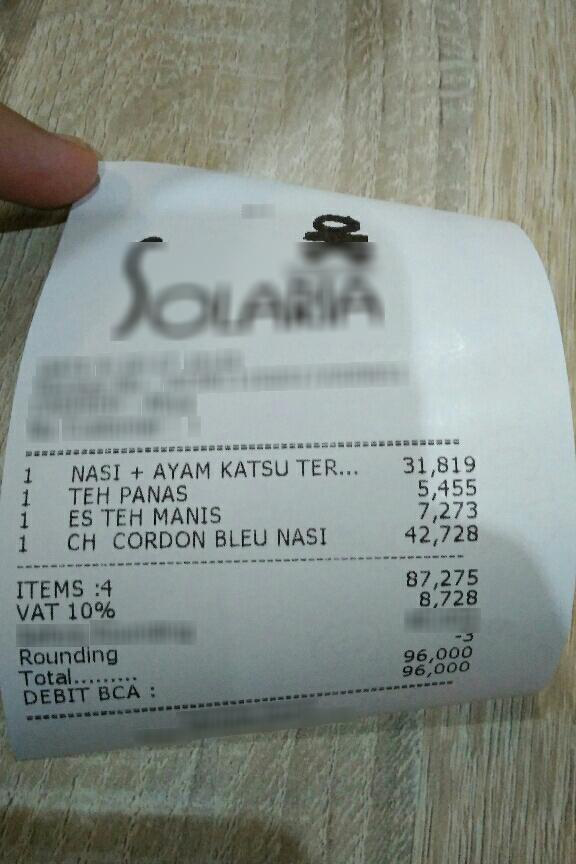

In [ ]:
image

In [ ]:
gt_pred = [{'menu': [{'nm': ['NASI + AYAM KATSU TER...',
     0.9999186197916666,
     [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]],
    'cnt': ['1', 1.0, [17]],
    'price': ['31,819', 1.0, [20, 21, 22]]},
   {'nm': ['TEH PANAS', 0.999755859375, [26, 27, 28, 29]],
    'cnt': ['1', 1.0, [32]],
    'price': ['5,455', 1.0, [35, 36, 37, 38]]},
   {'nm': ['ES TEH MANIS', 1.0, [42, 43, 44, 45, 46]],
    'cnt': ['1', 1.0, [49]],
    'price': ['7,273', 1.0, [52, 53, 54, 55]]},
   {'nm': ['CH CORDON BLEU NASI',
     0.9999302455357143,
     [59, 60, 61, 62, 63, 64, 65]],
    'cnt': ['1', 1.0, [68]],
    'price': ['42,728', 1.0, [71, 72, 73, 74]]}],
  'sub_total': {'subtotal_price': ['87,275', 1.0, [79, 80, 81, 82]],
   'tax_price': ['8,728', 1.0, [85, 86, 87]],
   'etc': ['-3', 1.0, [90, 91]]},
  'total': {'total_price': ['96,000', 1.0, [96, 97]],
   'creditcardprice': ['96,000', 1.0, [100, 101]],
   'menuqty_cnt': ['ITEMS :4', 0.99990234375, [104, 105, 106, 107, 108]]}}]

In [ ]:
output["predictions"] == gt_pred

True

In [ ]:
output["predictions"]

[{'menu': [{'nm': ['NASI + AYAM KATSU TER...',
     0.9999186197916666,
     [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]],
    'cnt': ['1', 1.0, [17]],
    'price': ['31,819', 1.0, [20, 21, 22]]},
   {'nm': ['TEH PANAS', 0.999755859375, [26, 27, 28, 29]],
    'cnt': ['1', 1.0, [32]],
    'price': ['5,455', 1.0, [35, 36, 37, 38]]},
   {'nm': ['ES TEH MANIS', 1.0, [42, 43, 44, 45, 46]],
    'cnt': ['1', 1.0, [49]],
    'price': ['7,273', 1.0, [52, 53, 54, 55]]},
   {'nm': ['CH CORDON BLEU NASI',
     0.9999302455357143,
     [59, 60, 61, 62, 63, 64, 65]],
    'cnt': ['1', 1.0, [68]],
    'price': ['42,728', 1.0, [71, 72, 73, 74]]}],
  'sub_total': {'subtotal_price': ['87,275', 1.0, [79, 80, 81, 82]],
   'tax_price': ['8,728', 1.0, [85, 86, 87]],
   'etc': ['-3', 1.0, [90, 91]]},
  'total': {'total_price': ['96,000', 1.0, [96, 97]],
   'creditcardprice': ['96,000', 1.0, [100, 101]],
   'menuqty_cnt': ['ITEMS :4', 0.99990234375, [104, 105, 106, 107, 108]]}}]

## token_indices must be selected from the output of model predictions when return_tokens is set to True.

These token indices are acquired after modifying the XLMRoBERTaTokenizer's `batch_decode`, `decode`, and `_decode` methods inside `donut/model_custom.py`

In [ ]:
decoder_cross_attentions = output["attentions"]["cross_attentions"]
token_indexes = [59, 60, 61, 62, 63, 64, 65]  # represents the token indices for 'CH CORDON BLEU NASI' as seen in output["predictions"]

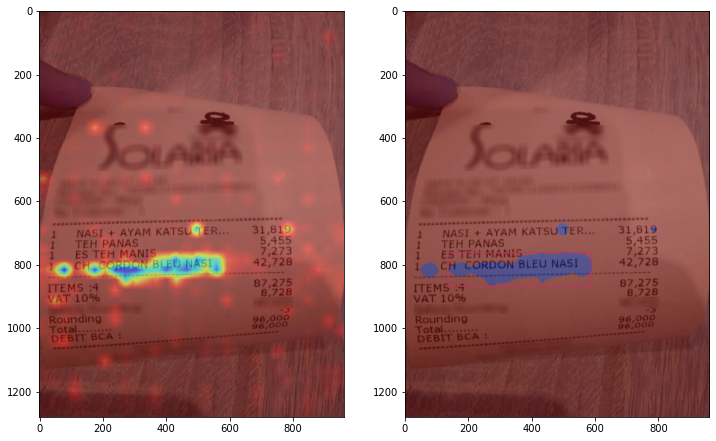

In [ ]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy


box, thres_heatmap, agg_heatmap = DonutModelCustom.max_bbox_from_heatmap(decoder_cross_attentions, token_indexes, discard_ratio=0.5, return_thres_agg_heatmap=True)

img_path = "image.jpg"
image = cv2.imread(img_path)
image = cv2.resize(image, (960, 1280))

raw_heatmap = deepcopy(agg_heatmap)
raw_image = deepcopy(image)

x1, y1, x2, y2 = box
cv2.rectangle(image, (x1, y1), (x2, y2), (255,100,200), 2)

heatmap_img = cv2.applyColorMap(thres_heatmap, cv2.COLORMAP_JET)
super_imposed_img = cv2.addWeighted(heatmap_img, 0.5, image, 0.5, 0)

super_imposed_raw_heatmap_img = cv2.addWeighted(cv2.applyColorMap(raw_heatmap, cv2.COLORMAP_JET), 0.5, raw_image, 0.5, 0)

# display image with heatmap
images_2_disp = [super_imposed_raw_heatmap_img, super_imposed_img]
plt.figure(figsize=(12, 18))
columns = 2
for i, img2disp in enumerate(images_2_disp):
    plt.subplot(len(images_2_disp) // columns + 1, columns, i + 1)
    plt.imshow(img2disp)

# Document VQA Example (Have to use original unmodified DONUT Model)

In [ ]:
model = DonutModel.from_pretrained(
    "naver-clova-ix/donut-base-finetuned-docvqa")

if torch.cuda.is_available():
    model.half()
    device = torch.device("cuda")
    model.to(device)
else:
    model.encoder.to(torch.bfloat16)
model.eval()

In [ ]:
question = "What is the total?"
img_path = "image.jpg"

task_prompt = f"<s_docvqa><s_question>{question}</s_question><s_answer>"
image = Image.open(img_path).convert("RGB")
output = model.inference(image=image, prompt=task_prompt, return_attentions=True)

In [ ]:
output["predictions"]

[{'question': 'What is the total?', 'answer': '96,000'}]

In [ ]:
decoder_cross_attentions = output["attentions"]["cross_attentions"]
token_indexes = [i for i in range(len(decoder_cross_attentions))]

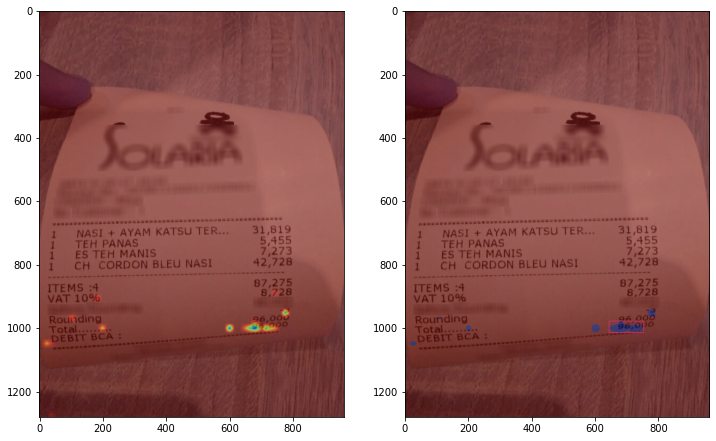

In [ ]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy


box, thres_heatmap, agg_heatmap = DonutModelCustom.max_bbox_from_heatmap(decoder_cross_attentions, token_indexes, heatmap_h=80, heatmap_w=60, return_thres_agg_heatmap=True)

img_path = "image.jpg"
image = cv2.imread(img_path)
image = cv2.resize(image, (960, 1280))

raw_heatmap = deepcopy(agg_heatmap)
raw_image = deepcopy(image)

x1, y1, x2, y2 = box
cv2.rectangle(image, (x1, y1), (x2, y2), (255,100,200), 2)

heatmap_img = cv2.applyColorMap(thres_heatmap, cv2.COLORMAP_JET)
super_imposed_img = cv2.addWeighted(heatmap_img, 0.5, image, 0.5, 0)

super_imposed_raw_heatmap_img = cv2.addWeighted(cv2.applyColorMap(raw_heatmap, cv2.COLORMAP_JET), 0.5, raw_image, 0.5, 0)

# display image with heatmap
images_2_disp = [super_imposed_raw_heatmap_img, super_imposed_img]
plt.figure(figsize=(12, 18))
columns = 2
for i, img2disp in enumerate(images_2_disp):
    plt.subplot(len(images_2_disp) // columns + 1, columns, i + 1)
    plt.imshow(img2disp)